# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

┌ Warning: x_tol is deprecated. Use x_abstol or x_reltol instead. The provided value (-1) will be used as x_abstol.
└ @ Optim ~/.julia/packages/Optim/8dE7C/src/types.jl:110
┌ Warning: f_tol is deprecated. Use f_abstol or f_reltol instead. The provided value (-1) will be used as f_reltol.
└ @ Optim ~/.julia/packages/Optim/8dE7C/src/types.jl:120
n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +28.51173332099                   -1.45    5.58s
  2   +19.21848586827        0.97       -0.90   10.3ms
  3   +13.41022345955        0.76       -0.54   10.2ms
  4   +11.64816792080        0.25       -0.48   8.34ms
  5   +10.99551041797       -0.19       -0.71   8.31ms
  6   +9.556433575665        0.16       -0.73   8.25ms
  7   +8.894926336909       -0.18       -0.66   8.37ms
  8   +8.539942790476       -0.45       -0.78   8.31ms
  9   +8.489982155734       -1.30       -1.04   6.38ms
 10   +8.406501689964       -1.08       -1.18   6.

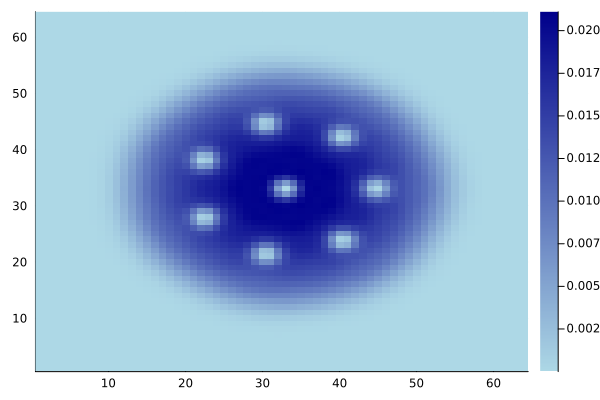

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)